### Unsupervised Machine Learning -Clustering using K-Means

K-means clustering is an unsupervised learning technique that issuitable for working with unlabelled data that lacks predefined categories or groups. The primary objective of this algorithm is to group similar data points together, with the number of groups determined by the value of K. The algorithm follows an iterative approach and assigns each data point to one of the K groups based on the features that are provided

In [1]:
# import the libraries

# Data analysis Libraries
import pandas as pd
import numpy as np

# Data visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score,homogeneity_score
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\ANITA AKPUMA\OneDrive\ACADEMIA\DATA SCIENCE\Machine Learning\Unsupervised ml\Selore\Customers (1).csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## DATA CLEANING AND PRE PROCESSING

In [6]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

<Axes: >

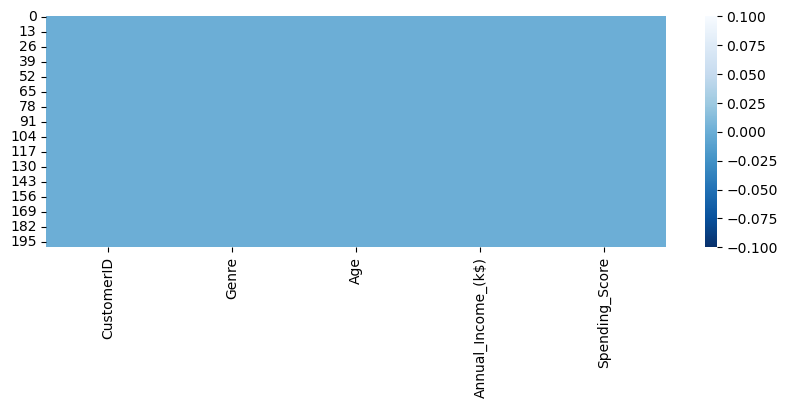

In [7]:
# Visualise the missing values

plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(),cbar=True, cmap ='Blues_r')

In [8]:
df.duplicated().sum()

0

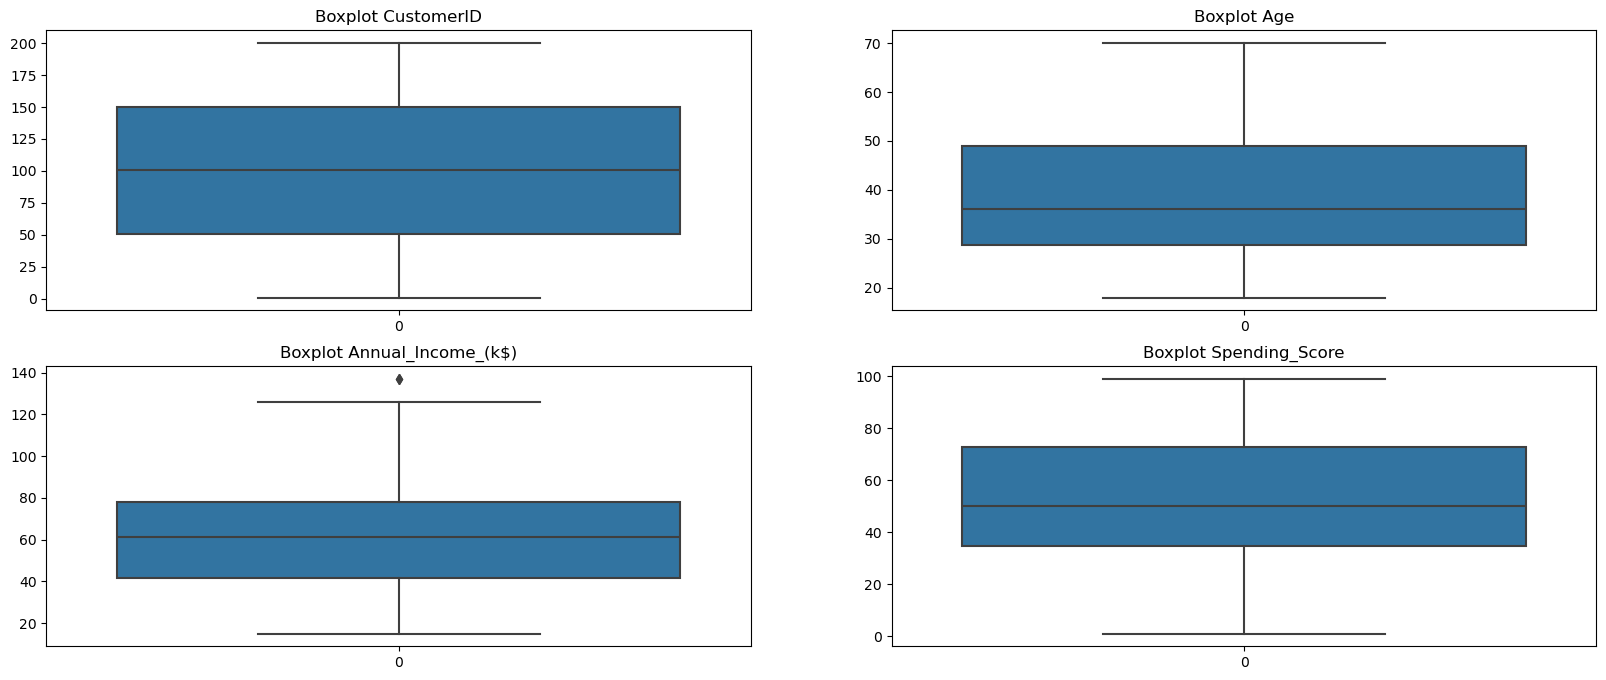

In [9]:
numerical_cols = df.select_dtypes(include = 'number')

fig,ax = plt.subplots(nrows=2,ncols=2, figsize=(20,8))
ax=ax.flatten()

for idx, col in enumerate (numerical_cols):
    sns.boxplot(df[col],ax=ax[idx])
    ax[idx].set_title(f'Boxplot {col}')

plt.show()


# Explore the following :

- Univariate
- Bivariate
- Multivariate

In [10]:
def age_group(x):
    if x <= 30:
        return "Young Adult 18-30",
    elif x <=45:
        return "Middle-age Adult 31- 45",
    elif x <= 60:
        return "Matured Adult 46-60",
    else:
        return "Elder above 60",

df['age_group'] = df['Age'].apply(age_group)

df = df.rename(columns = {'Annual_Income_(k$)':'Annual_Income'})



def Annual_Income_cat(a):
    if a <= 0.7 * 61.5:
        return "Low Income"
    else:
        return "High Income"
df['Annual_Income_cat'] = df['Annual_Income'].apply(Annual_Income_cat)

df.head()




,CustomerID,Genre,Age,Annual_Income,Spending_Score,age_group,Annual_Income_cat
0,1,Male,19,15,39,"(Young Adult 18-30,)",Low Income
1,2,Male,21,15,81,"(Young Adult 18-30,)",Low Income
2,3,Female,20,16,6,"(Young Adult 18-30,)",Low Income
3,4,Female,23,16,77,"(Young Adult 18-30,)",Low Income
4,5,Female,31,17,40,"(Middle-age Adult 31- 45,)",Low Income


#### UNIVARIATE ANALYSIS

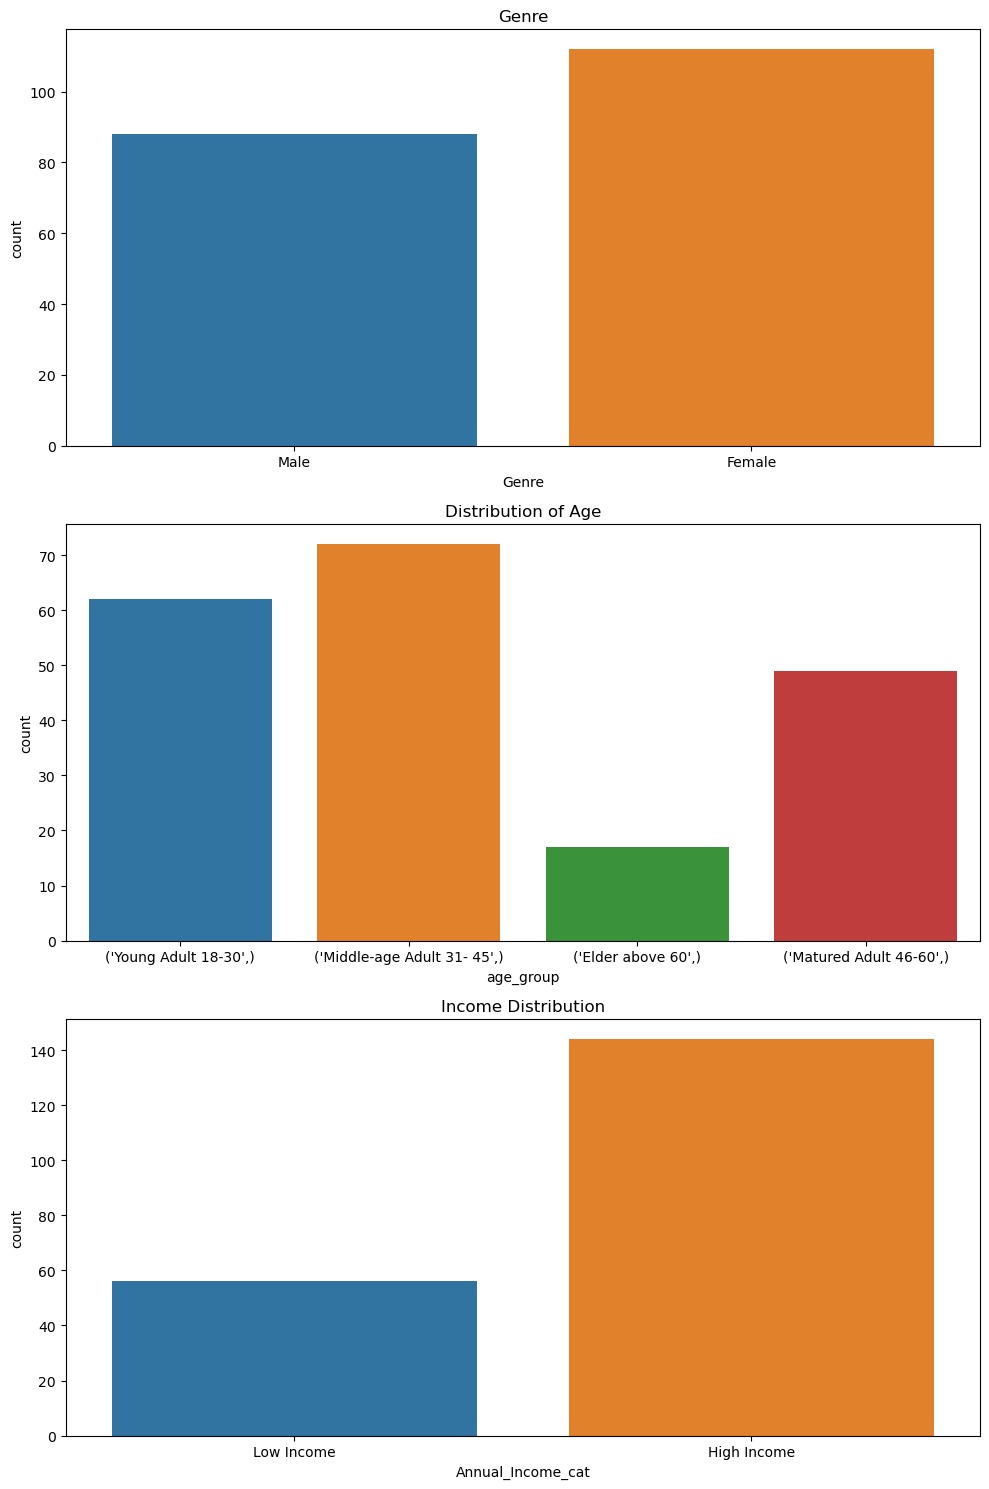

In [11]:
fig,ax= plt.subplots(nrows=3,ncols=1,figsize=(10,15))

sns.countplot(x='Genre',data=df, ax=ax[0])
ax[0].set_title('Genre')

sns.countplot(x='age_group', data=df, ax=ax[1])  # Corrected this line
ax[1].set_title('Distribution of Age')


sns.countplot(x='Annual_Income_cat',data=df, ax=ax[2])
ax[2].set_title('Income Distribution')


plt.tight_layout() 
plt.show()

# sns.countplot(x=df['Genre']);

### BIVARIATE ANALYSIS

Text(0.5, 1.0, 'income by Age Group')

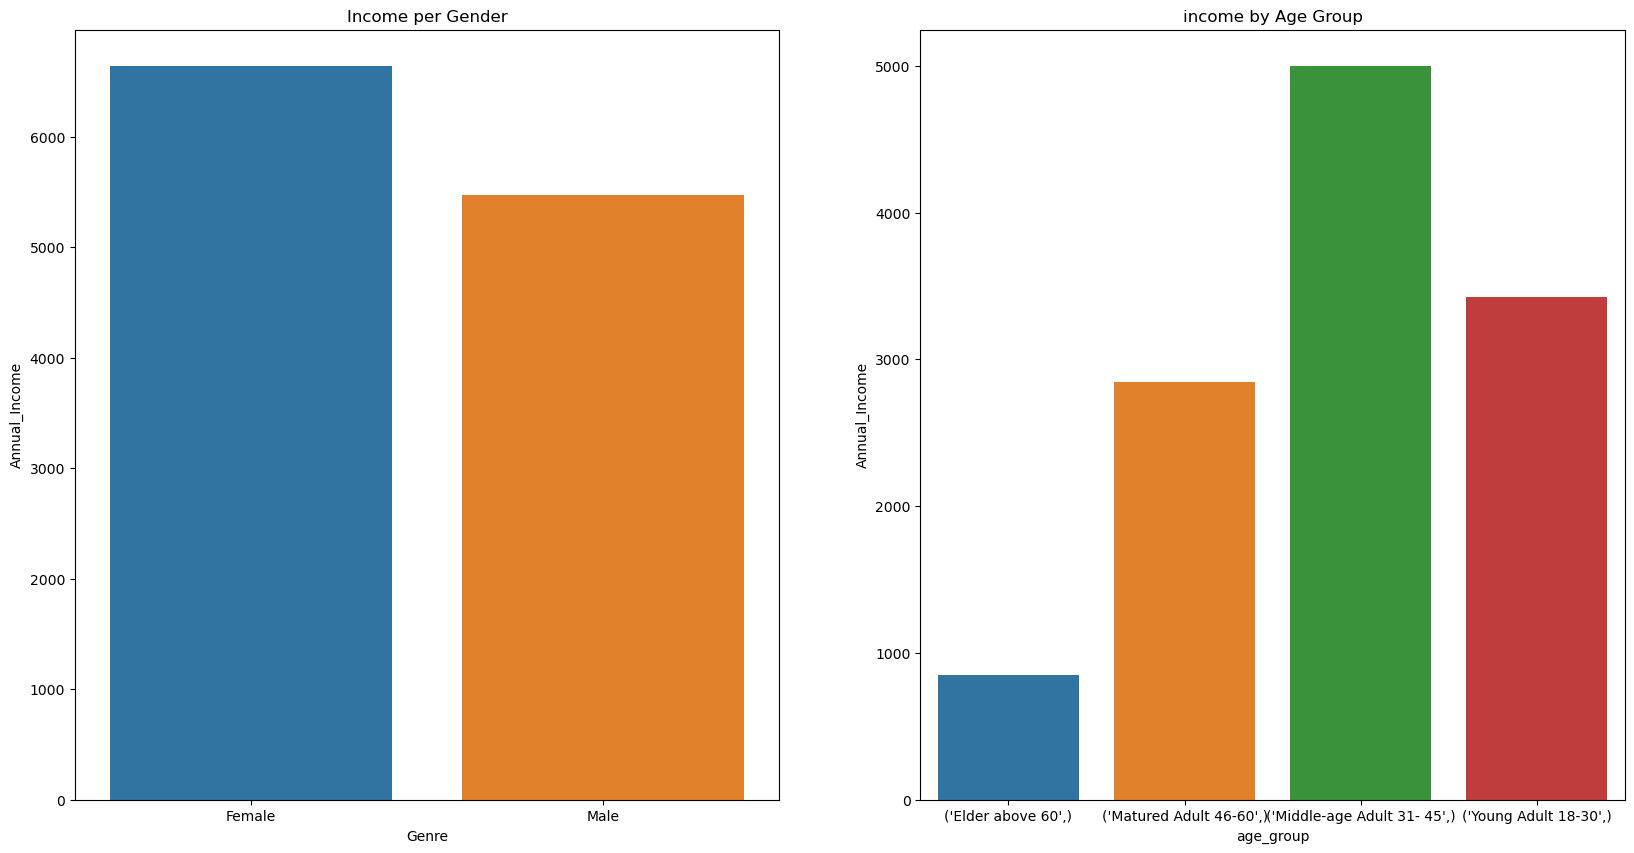

In [12]:

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize= (20,10))


genre_income= df.groupby('Genre')['Annual_Income'].sum().reset_index()
sns.barplot(x='Genre',data=genre_income, y='Annual_Income', ax=ax[0])
ax[0].set_title('Income per Gender')

age_income = df.groupby('age_group')['Annual_Income'].sum().reset_index()
sns.barplot(x='age_group', data=age_income, y='Annual_Income', ax=ax[1])
ax[1].set_title('income by Age Group')


In understanding our data type, most of our customers earn high income (60% above the median income of $61.5k), and majority of the high income earners are females. We can also notice that we have a higher number of middle age customers (ages 31-45) who earn high salary. 

Therefore from this data, the company can generate more income by targeting marketing campaigns and incentives to the middle aged adults, as they tend to be the revenue drivers of the comapny. The next category of customers will be the young adult as they are also revenue drivers for the company.


In [13]:
#Drop irrelevant columns before encoding

col_to_drop = ['age_group','Annual_Income_cat','CustomerID']
df.drop(columns =[col for col in col_to_drop if col in df.columns], inplace=True)

df.columns

Index(['Genre', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [14]:
# Building a model

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

categorical_col = ['Genre']
for column_name in categorical_col:
    df[column_name]=le.fit_transform(df[column_name])
    
df.head()

,Genre,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


After applying the k-means clustering algorithm, we can determine the optimal number of clusters by using the Elbow method. This method invloves plotting within cluster sum of squares (WCSS) against the number of clusters (k) and selecting the value of K, where the rate of decrease in WCSS slows down significntly. In the graph below, we can observe that after k=3, there is no significant decrease in WCSS, indicating that 3 is the optimal number of the clusters in this case. Although the optimal value of K may not always be apparant from the graph, with practice, it becomes easier to identify the elbow point where the rate of decrease in WCSS slows down significantly.

![Alt Text](https://i.imgur.com/gi9p7V5.png)

<function matplotlib.pyplot.show(close=None, block=None)>

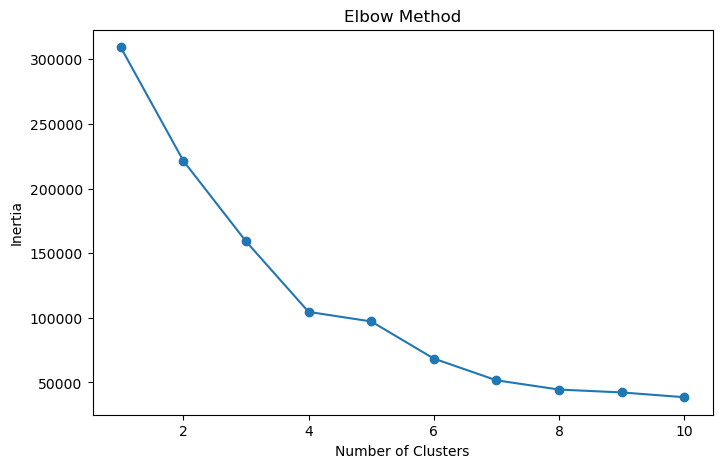

In [27]:
# Determine the optimal number of clusters

inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k,n_init='auto',random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show
    




In this code block, the objective is to determine the optimal number of clusters for the k-means clustering algorithm. The optimal number of clusters is important because it affects the quality of the clustering result.

The within-cluster sum of squares(WCSS) is used to determine the optimal number of cluters. WCSS mesures the sum of the squared distance between each point and its corresponding cluster centroid. The idea is to minimize the WCSS by increasing the number of clusters until a certain point where the WCSS starts to decrease at a lower rate

The loop iterates over a range of values from 1 to 10, vreating a KMeans clustering model for each value of i. Th 'init' parameter is set to 'k-means++', which is a method to initialize the centroids in a smart way to speed up convergence. The 'random_state' parameter is set up to 42 for reproducibility. The 'fit' method is used to fit the KMeans model to the data, and the inertia(WCSS) is computed and appended to the 'wcss' list.

Finally, a plot is created with the number of clusters on the x-axis. The plot is called the 'Elbow Method' plot because it looks like an elbow where the optimal number of clusters is the point where the WCSS starts to decrease at a slower rate. In this case, the plot shows that the optimal number of clusters is 5, as the WCSS starts to decrease at a slower rate beyond that point.

In [28]:
# fit k-means clustering model
# Based on the elbow method, the number of clusters is 5

kmeans=KMeans(n_clusters=5, n_init=5, random_state=42)
kmeans.fit(df)

#add cluster labels to data

df['Cluster'] =kmeans.labels_

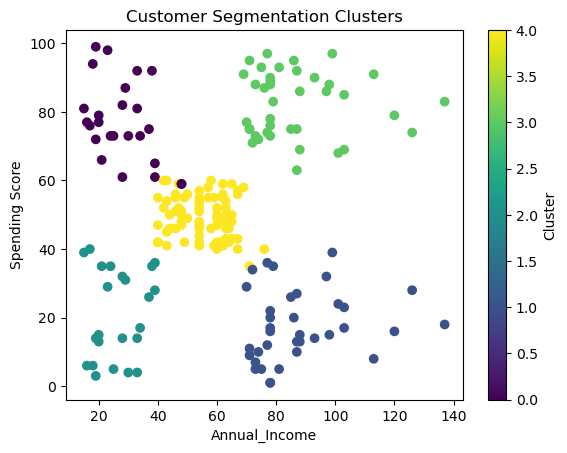

Silhouette Score: 0.4417000855313655


In [29]:
# Scatter plot of clusters
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual_Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation Clusters')
plt.colorbar(label='Cluster')  
plt.show()

# Compute silhouette score
df_numeric = df.select_dtypes(include=['number'])  # Ensure numeric data
silhouette = silhouette_score(df_numeric, kmeans.labels_)
print("Silhouette Score:", silhouette)

### Business Insights

- Cluster 1 = Moderate spending, low income buyers
- Cluster 2 = High spending, Low income buyers
- Cluster 3 = High Spending, middle class income buyers
- Cluster 4 = Low spending, Middle class Income buyers
- Cluster 5 = High spending, High income buyers